### Isentropic Flow

Philipp Schlatter, 2025 LSTM / FAU

Colab: https://colab.research.google.com/github/pschlatt1/notebooks/blob/main/gasdyn.ipynb

Some preliminaries:

In [1]:
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
   # for Google Colab and interative figures
   !pip install -q ipympl ipywidgets
   from google.colab import output
   output.enable_custom_widget_manager()

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

%matplotlib widget

In [3]:
gamma = 1.4

### Isentropic relations

Plots the typical formulas for isentropic one-dimensional compressible flow as function of Mach number $Ma$.

Calculate the various quantities

In [4]:
TT0     = lambda Ma, gamma : 1/(1+(gamma-1)/2*Ma**2)
aa0     = lambda Ma, gamma : np.sqrt(TT0(Ma,gamma))
pp0     = lambda Ma, gamma : TT0(Ma,gamma)**(gamma/(gamma-1))
rhorho0 = lambda Ma, gamma : TT0(Ma,gamma)**(1/(gamma-1))
AsA     = lambda Ma, gamma : Ma*rhorho0(Ma,gamma)*TT0(Ma,gamma)**0.5*(rhorho0(1,gamma)*TT0(1,gamma)**0.5 )**(-1)

In [5]:
pp0(2,gamma)

0.12780452546295093

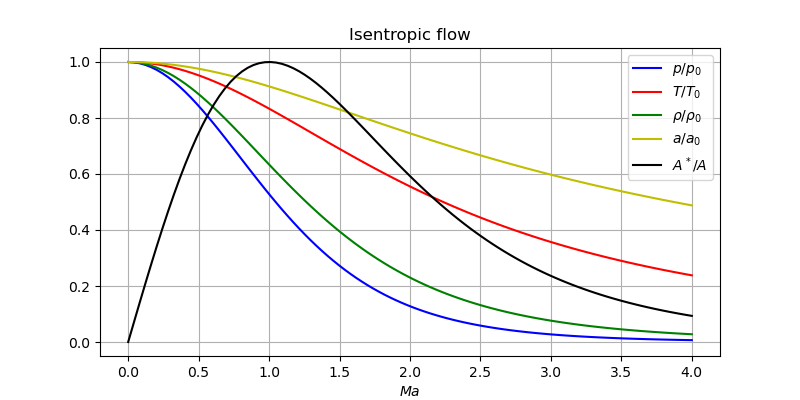

In [6]:
Ma = np.linspace(0,4,100)
plt.figure(figsize=(8,4))
plt.plot(Ma,pp0(Ma,gamma), 'b-',label=r'$p/p_0$')
plt.plot(Ma,TT0(Ma,gamma), 'r-',label=r'$T/T_0$')
plt.plot(Ma,rhorho0(Ma,gamma), 'g-',label=r'$\rho/\rho_0$')
plt.plot(Ma,aa0(Ma,gamma), 'y-',label=r'$a/a_0$')
plt.plot(Ma,AsA(Ma,gamma), 'k-',label=r'$A^*/A$')
plt.xlabel(r'$Ma$')
plt.legend()
plt.grid()
plt.title('Isentropic flow')
plt.show()

#### Cricital values at $Ma=1$:

In [7]:
print('p*/p0     = ',pp0(1,gamma))
print('T*/T0     = ',TT0(1,gamma))
print('rho*/rho0 = ',rhorho0(1,gamma))
print('a*/a0     = ',aa0(1,gamma))
print('A*/A*     = ',AsA(1,gamma))

p*/p0     =  0.5282817877171742
T*/T0     =  0.8333333333333334
rho*/rho0 =  0.633938145260609
a*/a0     =  0.9128709291752769
A*/A*     =  1.0


#### Mass flux $\dot{m}$:

Note that `mflux` does not include the area, i.e. only the first bracket: $\dot{m} = \rho U A = (\frac{\rho}{\rho_0} Ma \frac{a}{a_0}) \cdot (A \rho_0 a_0)$. This expression then becomes equivalen to $A^*/A$ computed above.

In [8]:
mflux = lambda Ma, gamma: rhorho0(Ma,gamma)*Ma*aa0(Ma,gamma)
# same as mflux = lambda Ma, gamma: np.sqrt(gamma)*Ma*(1+(gamma-1)/2*Ma**2)**(-(gamma+1)/2/(gamma-1))
# same as AsA(Ma,gamma) from above

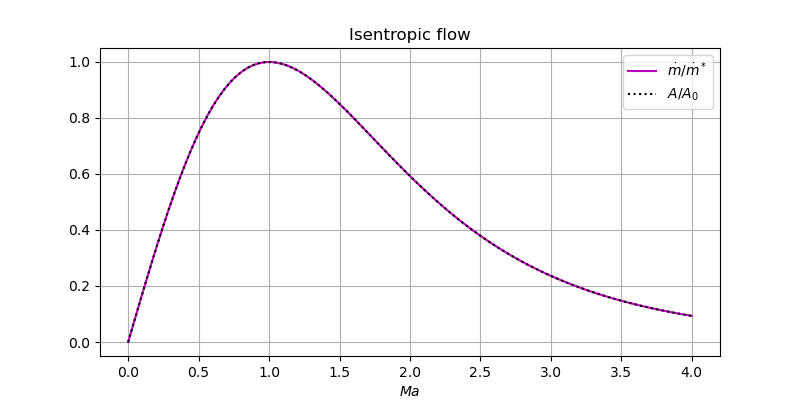

In [9]:
Ma = np.linspace(0,4,100)
plt.figure(figsize=(8,4))
plt.plot(Ma,mflux(Ma,gamma)/mflux(1,gamma), 'm-',label=r'$\dot{m}/\dot{m}^*$')
plt.plot(Ma,AsA(Ma,gamma), 'k:',label=r'$A/A_0$')
plt.xlabel(r'$Ma$')
plt.legend()
plt.grid()
plt.title('Isentropic flow')
plt.show()

In [10]:
print('mass flux at Ma=1: ',mflux(1,gamma))

mass flux at Ma=1:  0.5787037037037038


#### Deviation from incompressible at low $Ma$:

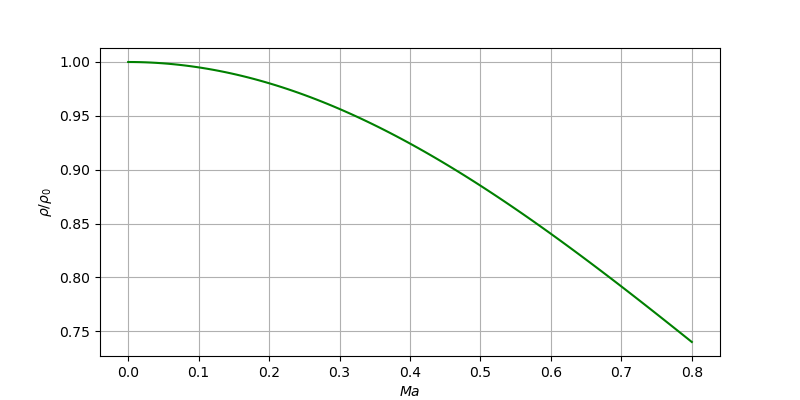

In [11]:
Ma = np.linspace(0,0.8,100)
plt.figure(figsize=(8,4))
plt.plot(Ma,rhorho0(Ma,gamma), 'g-',label=r'$\rho/\rho_0$')
plt.xlabel(r'$Ma$')
plt.ylabel(r'$\rho/\rho_0$')
plt.grid()
plt.show()

### Compressible Bernoulli equation

In [12]:
f_approx = lambda Ma : (1+0.25*Ma**2-(2-gamma)/24*Ma**4)
f = lambda Ma : 2/(gamma*Ma**2)*( (1+(gamma-1)/2*Ma**2)**(gamma/(gamma-1)) -1 )

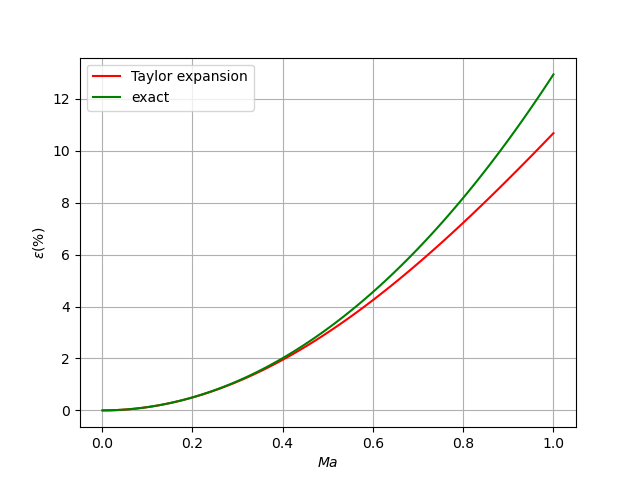

In [13]:
Ma_inf = np.linspace(0.001,1,100)
gamma = 1.4
plt.figure()
plt.xlabel(f'$Ma$')
plt.ylabel(f'$\epsilon(\%)$')
plt.plot( Ma_inf,100*(np.sqrt(f_approx(Ma_inf))-1),'r',label='Taylor expansion')
plt.plot( Ma_inf, 100*(np.sqrt(f(Ma_inf))-1),'g',label='exact')
plt.grid()
plt.legend()
plt.show()

In [14]:
f(0.3)

1.0227029548085431

In [15]:
np.sqrt(f(0.3))

1.0112877705225862

### Homework: Mass flow through a de Laval nozzle

Let's consider a de Laval nozzle with stagnation pressure $p_0=3.7$ bar, and exit pressure $p_e=1$ bar. The first task is to determine the exit area $A_e$ for a given throat area $A^*=17$ cm$^2$. The fluid is air ($\gamma=1.4$, $R=287 \mathrm{m}^2/\mathrm{s}^2/\mathrm{K}$), and the stagnation temperature is 300 K.

We can use the above isentropic relations to compute all necessary quantities. We will use `fsolve` if needed.

In [16]:
from scipy.optimize import fsolve

First, we want to get the Mach number corresponding to $p_e/p_0=1/3.7=0.27$

In [56]:
fsolve(lambda Ma: pp0(Ma,gamma)-1/3.7,1)

array([1.50542369])

With this $Ma_e=1.5$ we compute $A^*/A_e$

In [62]:
AsA(1.50542369,gamma)

0.8475638728457349

Now, $A_e=A^*/0.84=17\mathrm{cm}^2/0.84$

In [20]:
17/0.8475638728457349

20.057485393899242

We get as the result that $A_e = 20 \mathrm{cm}^2$. 

The next question could be: What is the exit pressure such that the flow in the nozzle never gets supersonic, i.e. the lowest pressure to not get choked flow?

For this, we find the subsonic Mach number corresponding to isentropic expansion with the given area ratio: 

In [65]:
fsolve(lambda Ma: AsA(Ma,gamma)-0.8475638728457349,x0=0)

array([0.60718181])

With this $Ma_e=0.607$ we find the pressure ratio $p_e/p_0$:

In [22]:
pp0(0.60718181,gamma)

0.7795816390945001

and then directly $p_e=0.780 p_0$

In [23]:
3.7*0.7795816390945001

2.8844520646496505

The external pressure needs to be $p_e=2.88~\mathrm{bar}$ to just reach $Ma=1$ in the throat. That means that for any $p_e$ lower than $2.88~\mathrm{bar}$, the flow is choked, and the mass flux is $\dot{m} = \rho^* a^* A^* Ma^* = (\rho^*/\rho_0) ( a^*/a_0) A^* Ma^* \rho_0 a_0$ (in SI units, kg/s)



In [117]:
mdot_chocked = rhorho0(1,gamma)*aa0(1,gamma)*17.*10**(-4)*1*3.7*10**5/287/300*np.sqrt(1.4*300*287)
mdot_chocked

1.467808334621317

For an exit pressure larger than $2.88~\mathrm{bar}$, we get as mass flux $\dot{m} = \rho_e a_e A_e Ma_e = (\rho_e/\rho_0) ( a_e/a_0) A_e Ma_e \rho_0 a_0$ (in SI units, kg/s)

In [119]:
def mdot_subsonic(pe):
   Mae = fsolve(lambda Ma: pp0(Ma,gamma)-pe/3.7,x0=1)
   return rhorho0(Mae,gamma)*aa0(Mae,gamma)*20.*10**(-4)*Mae*3.7*10**5/287/300*np.sqrt(1.4*300*287)
mdot_subsonic(3.0)

array([1.38527142])

In [193]:
def mdot(pe):
    return min(mdot_subsonic(pe)[0],mdot_chocked)
def mdot_inc(pe):
    rho0 = 3.7*10**5/287/300
    return rho0*np.sqrt(2*(3.7-pe)*10**5/rho0)*20*10**(-4)

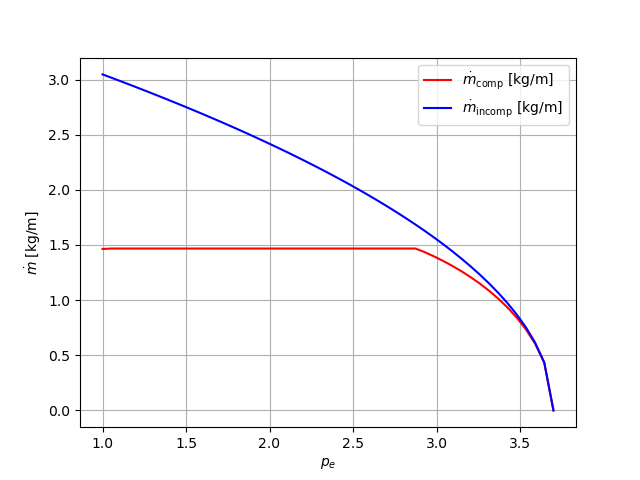

In [199]:
pe = np.linspace(3.7,1,50)
md = np.zeros(pe.size)
mdi = np.zeros(pe.size)
for i in range(pe.size):
    md[i] = mdot(pe[i])
    mdi[i] = mdot_inc(pe[i])
plt.figure()
plt.xlabel(r'$p_e$ [bar]')
plt.ylabel(r'$\dot{m}$ [kg/m]')
plt.plot( pe, md,'-r',label=r'$\dot{m}_\mathrm{comp}$ [kg/m]')
plt.plot( pe, mdi,'-b',label=r'$\dot{m}_\mathrm{incomp}$ [kg/m]')
plt.grid()
plt.legend()
plt.show()

We can see that the main difference in mass flux comes from the chocked flow below $2.88~\mathrm{bar}$.